### Instrucciones
1. Sin utilizar las bibliotecas de *scikit-learn* para regresión lineal, elabora un programa en Python que implemente **BGD monovariable sin sesgo**.

### Entrada
- Archivo `casas.csv`
- Número de iteraciones
- Peso inicial
- Valor de α (learning rate)

### Procedimiento
- Divide `casas.csv` en:
  - 70% para entrenamiento
  - 30% para pruebas  
  Usando los parámetros:  
  `shuffle=True` y `random_state=0`.

### Salida
(Ver ejemplo de la **Figura 1**)

- Peso en cada iteración calculado con el conjunto de entrenamiento.
- Valores `y_test`.
- Valores `y_pred` en cada iteración.
- Error de estimación:  

  $
  \sigma = \sum_{i=1}^{n} (y_{pred_i} - y_{test_i})
  $

- **Gráfica 1**
  - Distribución de los datos de prueba
  - Valores `y_pred` en cada iteración
- **Gráfica 2**
  - Error de estimación de cada iteración

In [34]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ---------------------
# Parámetros (ajusta si hace falta)
csv_file = 'casas.csv'             # <- cámbialo si tu archivo tiene otro nombre
feature_col_index = 0              # usar la primera columna como X (monovariable)
target_col_index = -1              # última columna como y
iterations = 100
alpha = 0.000001
# ---------------------

# Cargar dataset
dataset = pd.read_csv(csv_file)

# Seleccionar feature monovariable y target
X_all = dataset.iloc[:, feature_col_index].values  # vector 1D
Y_all = dataset.iloc[:, target_col_index].values   # vector 1D

# Asegurar tipo float
X_all = X_all.astype(float)
Y_all = Y_all.astype(float)

# Split 70% train / 30% test (shuffle=True, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(
    X_all, Y_all, test_size=0.3, shuffle=True, random_state=0
)

# Convertir a vectores 1D de numpy (por seguridad)
X_train = np.asarray(X_train).flatten()
X_test  = np.asarray(X_test).flatten()
Y_train = np.asarray(Y_train).flatten()
Y_test  = np.asarray(Y_test).flatten()

n_train = X_train.shape[0]

# Inicializar peso (escalares)
w = 0.0

In [35]:

def compute_gradient(w, X, Y):
    """
    Gradiente para MSE (sin factor 1/2) para modelo y_pred = w * x
    MSE = (1/n) * sum( (w*x - y)^2 )
    dMSE/dw = (2/n) * sum( (w*x - y) * x )
    """
    residuals = (w * X - Y)          # vector
    grad = (2.0 / X.shape[0]) * np.dot(residuals, X)  # escalar
    return grad


Iter   1: w = 0.001662, sigma = -0.973751
Iter   2: w = 0.002124, sigma = -0.272129
Iter   3: w = 0.002252, sigma = -0.077265
Iter   4: w = 0.002287, sigma = -0.023145
Iter   5: w = 0.002297, sigma = -0.008115
Iter   6: w = 0.002300, sigma = -0.003940
Iter   7: w = 0.002301, sigma = -0.002781
Iter   8: w = 0.002301, sigma = -0.002459
Iter   9: w = 0.002301, sigma = -0.002369
Iter  10: w = 0.002301, sigma = -0.002344
Iter  11: w = 0.002301, sigma = -0.002337
Iter  12: w = 0.002301, sigma = -0.002335
Iter  13: w = 0.002301, sigma = -0.002335
Iter  14: w = 0.002301, sigma = -0.002335
Iter  15: w = 0.002301, sigma = -0.002335
Iter  16: w = 0.002301, sigma = -0.002335
Iter  17: w = 0.002301, sigma = -0.002335
Iter  18: w = 0.002301, sigma = -0.002335
Iter  19: w = 0.002301, sigma = -0.002335
Iter  20: w = 0.002301, sigma = -0.002335
Iter  21: w = 0.002301, sigma = -0.002335
Iter  22: w = 0.002301, sigma = -0.002335
Iter  23: w = 0.002301, sigma = -0.002335
Iter  24: w = 0.002301, sigma = -0

/tmp/ipykernel_73556/598571444.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


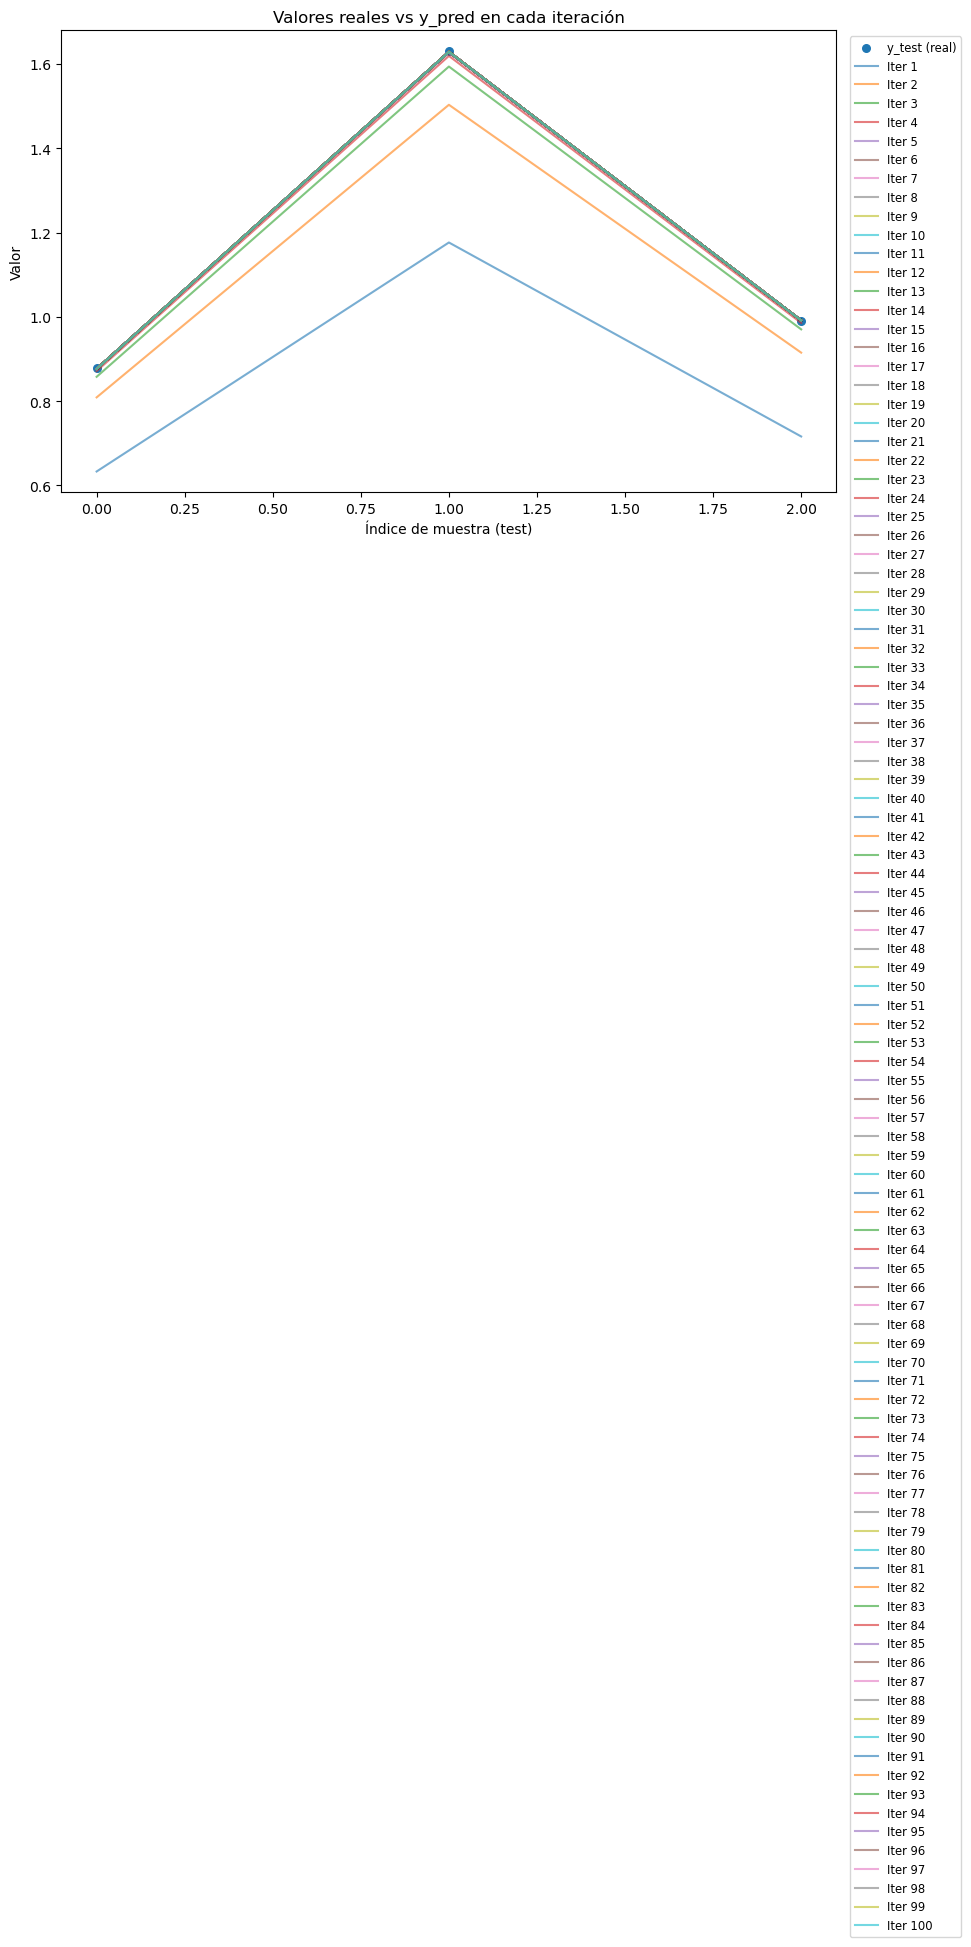

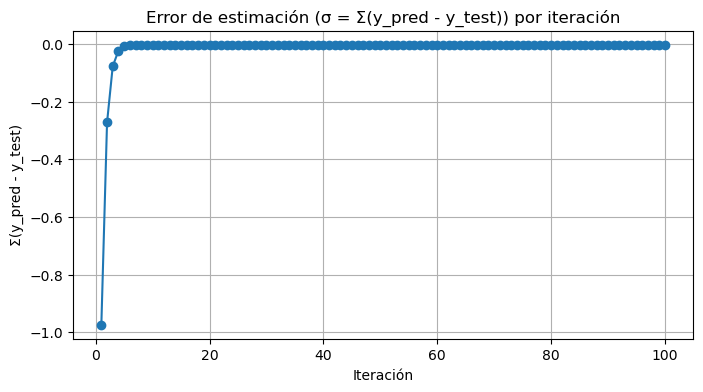

In [36]:
weights = []
errors_sigma = []   # sigma por iteración (Σ(y_pred - y_test))
preds_per_iter = [] # lista de vectores y_pred (sobre X_test)
w_current = w

for it in range(iterations):
    grad = compute_gradient(w_current, X_train, Y_train)
    w_current = w_current - alpha * grad

    # Predecir sobre conjunto de prueba
    y_pred_test = w_current * X_test

    # sigma según enunciado: suma de diferencias (no cuadrática)
    sigma = np.sum(y_pred_test - Y_test)

    # Guardar
    weights.append(w_current)
    errors_sigma.append(sigma)
    preds_per_iter.append(y_pred_test.copy())

    # Mostrar iteración
    print(f"Iter {it+1:3d}: w = {w_current:.6f}, sigma = {sigma:.6f}")

# Mostrar y_test y y_pred de la última iteración (ejemplo)
print("\nValores y_test (primeras 10 muestras):")
print(Y_test[:10])
print("\nValores y_pred (última iteración, primeras 10 muestras):")
print(preds_per_iter[-1][:10])

# ---------------------
# Gráfica 1: distribución de datos de prueba + y_pred por iteración
plt.figure(figsize=(10,6))
plt.scatter(range(len(Y_test)), Y_test, label='y_test (real)', s=30)
# plot de y_pred de cada iteración (con transparencia)
for i, y_pred in enumerate(preds_per_iter):
    plt.plot(range(len(Y_test)), y_pred, label=f'Iter {i+1}', alpha=0.6)
plt.title("Valores reales vs y_pred en cada iteración")
plt.xlabel("Índice de muestra (test)")
plt.ylabel("Valor")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

# ---------------------
# Gráfica 2: sigma por iteración
plt.figure(figsize=(8,4))
plt.plot(range(1, iterations+1), errors_sigma, marker='o')
plt.title("Error de estimación (σ = Σ(y_pred - y_test)) por iteración")
plt.xlabel("Iteración")
plt.ylabel("Σ(y_pred - y_test)")
plt.grid(True)
plt.show()